# Obtaining and evaluation of patient representations 

## Install the patient_representation package

In [ ]:
!pip install git+https://github.com/lueckenlab/patient_representation.git@main

## Import packages

In [31]:
import pandas as pd
import numpy as np
import scanpy as sc
import patient_representation as pr

In [3]:
pr.__version__

'0.1.20'

## Read the data

I will use [COMBAT dataset](https://zenodo.org/record/6120249/files/COMBAT-CITESeq-DATA.h5ad). You can set your own path

In [23]:
ADATA_PATH = "/Users/vladimir.shitov/Documents/science/PhD/2022_10_patients_representation/data/combat_processed.h5ad"

In [38]:
adata = sc.read_h5ad(ADATA_PATH)
adata

AnnData object with n_obs × n_vars = 783704 × 3000
    obs: 'Annotation_cluster_id', 'Annotation_cluster_name', 'Annotation_minor_subset', 'Annotation_major_subset', 'Annotation_cell_type', 'GEX_region', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_chain_composition', 'TCR_clone_ID', 'TCR_clone_count', 'TCR_clone_proportion', 'TCR_contains_unproductive', 'TCR_doublet', 'TCR_chain_TRA', 'TCR_v_gene_TRA', 'TCR_d_gene_TRA', 'TCR_j_gene_TRA', 'TCR_c_gene_TRA', 'TCR_productive_TRA', 'TCR_cdr3_TRA', 'TCR_umis_TRA', 'TCR_chain_TRA2', 'TCR_v_gene_TRA2', 'TCR_d_gene_TRA2', 'TCR_j_gene_TRA2', 'TCR_c_gene_TRA2', 'TCR_productive_TRA2', 'TCR_cdr3_TRA2', 'TCR_umis_TRA2', 'TCR_chain_TRB', 'TCR_v_gene_TRB', 'TCR_d_gene_TRB', 'TCR_j_gene_TRB', 'TCR_c_gene_TRB', 'TCR_productive_TRB', 'TCR_chain_TRB2', 'TCR_v_gene_TRB2', 'TCR_d_gene_TRB2', 'TCR_j_gene_TRB2', 'TCR_c_gene_TRB2', 'TCR_productive_TRB2', 'TCR_cdr3_TRB2', 'TCR_umis_TRB2', 'BCR_umis_HC', 'BCR_contig_qc_HC

## Describe columns containing sample IDs, cell types and metadata

In [39]:
sample_id_col = "scRNASeq_sample_ID"
cell_type_key = "Annotation_major_subset"
samples_metadata_cols = ["Source", "Outcome", "Death28", "Institute", "Pool_ID"]

## Store metadata and calculate QC metrics

In [40]:
metadata = adata.obs[samples_metadata_cols + [sample_id_col]].drop_duplicates()
metadata.set_index(sample_id_col, inplace=True)
metadata

,Source,Outcome,Death28,Institute,Pool_ID
scRNASeq_sample_ID,,,,,
S00109-Ja001E-PBCa,COVID_SEV,2.0,0,Oxford,gPlexA
S00112-Ja003E-PBCa,COVID_MILD,5.0,0,Oxford,gPlexA
S00005-Ja005E-PBCa,COVID_CRIT,2.0,0,Oxford,gPlexA
S00061-Ja003E-PBCa,COVID_SEV,4.0,0,Oxford,gPlexA
S00056-Ja003E-PBCa,COVID_SEV,3.0,0,Oxford,gPlexA
...,...,...,...,...,...
S00065-Ja003E-PBCa,COVID_CRIT,2.0,0,Oxford,gPlexK
S00048-Ja003E-PBCa,COVID_SEV,4.0,0,Oxford,gPlexK
G05112-Ja005E-PBCa,COVID_HCW_MILD,6.0,0,Oxford,gPlexK


In [41]:
cell_qc_metadata = pr.pp.calculate_cell_qc_metrics(adata, sample_key=sample_id_col, cell_qc_vars=["QC_ngenes", "QC_pct_mitochondrial", "QC_scrub_doublet_scores"])
cell_qc_metadata

,median_QC_ngenes,median_QC_pct_mitochondrial,median_QC_scrub_doublet_scores
scRNASeq_sample_ID,,,
G05061-Ja005E-PBCa,1107.0,3.011159,0.050648
G05064-Ja005E-PBCa,975.0,1.332430,0.060894
G05073-Ja005E-PBCa,1141.0,2.422559,0.044530
G05077-Ja005E-PBCa,1125.0,2.946723,0.048490
G05078-Ja005E-PBCa,999.0,2.825308,0.052783
...,...,...,...
U00607-Ua005E-PBUa,1827.0,2.982509,0.043323
U00613-Ua005E-PBUa,1251.5,2.053083,0.036956
U00617-Ua005E-PBUa,1410.5,3.886215,0.057906


In [42]:
n_genes_metadata = pr.pp.calculate_n_cells_per_sample(adata, sample_id_col)
n_genes_metadata

,n_cells
scRNASeq_sample_ID,
S00052-Ja005E-PBCa,13918
H00054-Ha001E-PBGa,10938
H00067-Ha001E-PBGa,10781
N00023-Ja001E-PBGa,10484
H00053-Ha001E-PBGa,10458
...,...
U00701-Ua005E-PBUa,872
U00601-Ua005E-PBUa,619
U00504-Ua005E-PBUa,161


In [43]:
composition_metadata = pr.pp.calculate_compositional_metrics(adata, sample_id_col, [cell_type_key], normalize_to=100)
composition_metadata

Annotation_major_subset,Annotation_major_subset_B,Annotation_major_subset_CD4,Annotation_major_subset_CD8,Annotation_major_subset_DC,Annotation_major_subset_DN,Annotation_major_subset_DP,Annotation_major_subset_GDT,Annotation_major_subset_HSC,Annotation_major_subset_MAIT,Annotation_major_subset_Mast,Annotation_major_subset_NK,Annotation_major_subset_PB,Annotation_major_subset_PLT,Annotation_major_subset_RET,Annotation_major_subset_cMono,Annotation_major_subset_iNKT,Annotation_major_subset_ncMono
scRNASeq_sample_ID,,,,,,,,,,,,,,,,,
G05061-Ja005E-PBCa,6.324900,33.921438,12.366844,1.597870,0.532623,0.499334,0.898802,0.066578,4.677097,0.000000,18.159121,0.316245,0.166445,0.016644,15.812250,0.033289,4.610519
G05064-Ja005E-PBCa,3.405158,47.147482,16.400581,1.819806,1.228090,0.725689,2.188233,0.022329,1.317405,0.000000,7.457854,0.446578,0.000000,0.000000,14.357486,0.000000,3.483309
G05073-Ja005E-PBCa,5.194338,45.609405,16.278791,1.487524,1.247601,0.839731,4.654511,0.011996,2.195298,0.011996,3.730806,0.203935,0.047985,0.000000,13.963532,0.083973,4.438580
G05077-Ja005E-PBCa,5.846211,29.231056,14.596909,1.377770,0.446844,1.340532,0.465463,0.167567,0.800596,0.018619,22.844908,1.079873,0.074474,0.018619,18.004096,0.055856,3.630609
G05078-Ja005E-PBCa,1.366381,39.000106,15.591569,2.340854,0.762631,0.730855,2.648025,0.211842,1.737104,0.021184,10.666243,0.148289,0.021184,0.000000,19.521237,0.497829,4.734668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U00607-Ua005E-PBUa,3.623898,10.577865,1.273262,4.701273,0.097943,0.195886,0.195886,0.685602,0.097943,0.000000,5.876592,1.175318,1.958864,0.097943,37.904016,0.000000,31.537708
U00613-Ua005E-PBUa,7.835052,26.391753,16.907216,0.721649,0.412371,0.309278,1.649485,0.000000,0.103093,0.000000,5.154639,1.237113,0.206186,0.000000,37.938144,0.000000,1.134021
U00617-Ua005E-PBUa,2.977233,41.418564,16.462347,0.437828,0.525394,0.262697,0.262697,0.963222,0.087566,0.000000,7.530648,17.513135,0.788091,0.087566,9.719790,0.000000,0.963222


Merge metadata tables

In [44]:
metadata = pd.concat([
    metadata,
    cell_qc_metadata.loc[metadata.index],
    n_genes_metadata.loc[metadata.index],
    composition_metadata.loc[metadata.index]
], axis=1)

In [45]:
metadata.shape

(140, 26)

## Run a simple pseudobulk representation

In [46]:
adata

AnnData object with n_obs × n_vars = 783704 × 3000
    obs: 'Annotation_cluster_id', 'Annotation_cluster_name', 'Annotation_minor_subset', 'Annotation_major_subset', 'Annotation_cell_type', 'GEX_region', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_chain_composition', 'TCR_clone_ID', 'TCR_clone_count', 'TCR_clone_proportion', 'TCR_contains_unproductive', 'TCR_doublet', 'TCR_chain_TRA', 'TCR_v_gene_TRA', 'TCR_d_gene_TRA', 'TCR_j_gene_TRA', 'TCR_c_gene_TRA', 'TCR_productive_TRA', 'TCR_cdr3_TRA', 'TCR_umis_TRA', 'TCR_chain_TRA2', 'TCR_v_gene_TRA2', 'TCR_d_gene_TRA2', 'TCR_j_gene_TRA2', 'TCR_c_gene_TRA2', 'TCR_productive_TRA2', 'TCR_cdr3_TRA2', 'TCR_umis_TRA2', 'TCR_chain_TRB', 'TCR_v_gene_TRB', 'TCR_d_gene_TRB', 'TCR_j_gene_TRB', 'TCR_c_gene_TRB', 'TCR_productive_TRB', 'TCR_chain_TRB2', 'TCR_v_gene_TRB2', 'TCR_d_gene_TRB2', 'TCR_j_gene_TRB2', 'TCR_c_gene_TRB2', 'TCR_productive_TRB2', 'TCR_cdr3_TRB2', 'TCR_umis_TRB2', 'BCR_umis_HC', 'BCR_contig_qc_HC

In [53]:
pseudobulk = pr.tl.TotalPseudobulk(sample_key=sample_id_col, cells_type_key=cell_type_key, layer="X_scVI")
pseudobulk.prepare_anndata(
    adata,
    sample_size_threshold=100,  # Samples with less cells are filtered out
    cluster_size_threshold=0  # Cell types with less cels in at least one sample are filtered out
)

2 samples removed: G05092-Ja005E-PBCa, S00030-Ja003E-PBCa
0 cell types removed: 


## Calculate a matrix of distances between samples

In [54]:
distances = pseudobulk.calculate_distance_matrix()
distances

/Users/vladimir.shitov/miniconda3/envs/patients_representation/lib/python3.10/site-packages/patient_representation/tl/basic.py:190: UserWarning: Using data from key X_scVI of adata.obsm
  warnings.warn(f"Using data from key {self.layer} of adata.obsm", stacklevel=1)


array([[0.        , 1.64099831, 2.96553122, ..., 1.95250026, 3.03192841,
        3.02217346],
       [1.64099831, 0.        , 2.12407907, ..., 2.16392363, 2.62691869,
        2.25420939],
       [2.96553122, 2.12407907, 0.        , ..., 3.22771463, 2.59879782,
        1.26095859],
       ...,
       [1.95250026, 2.16392363, 3.22771463, ..., 0.        , 2.58964553,
        3.24267928],
       [3.03192841, 2.62691869, 2.59879782, ..., 2.58964553, 0.        ,
        2.38191478],
       [3.02217346, 2.25420939, 1.26095859, ..., 3.24267928, 2.38191478,
        0.        ]])

/Users/vladimir.shitov/miniconda3/envs/patients_representation/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/vladimir.shitov/miniconda3/envs/patients_representation/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/vladimi

<AxesSubplot: xlabel='UMAP_0', ylabel='UMAP_1'>

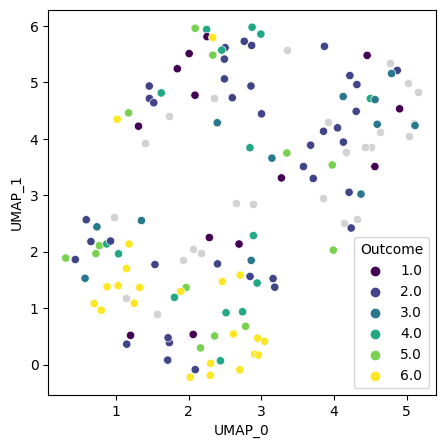

In [11]:
pseudobulk.plot_embedding(metada)